In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\internship\drug_dataset.csv')
df.head(300000)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,25-34,Other,12/13/2008,"ketoprofen capsule, extended release pellets 2...",5995,4,4,one of the few medicines i have found that hel...,4,Female,"Upset stomach , constipation , diarrhea , d...",10
299996,35-44,Pain,10/16/2008,"ketoprofen capsule, extended release pellets 2...",5995,2,2,arthritus in lower back still have headaches h...,1,Female,"Upset stomach , constipation , diarrhea , d...",0
299997,65-74,Type 2 Diabetes Mellitus,2/10/2008,januvia,145704,4,2,"So far, my average reading is around 200. I ne...",2,Female,,5
299998,45-54,Other,5/8/2008,"ketoprofen capsule, extended release pellets 2...",5995,3,4,My Name Steven M Banks Disabled Veteran I have...,4,Male,"Upset stomach , constipation , diarrhea , d...",15


In [3]:
df[['Age','Drug','Condition','Sex','Sides']].head(300000)
    

,Age,Drug,Condition,Sex,Sides
0,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...
299995,25-34,"ketoprofen capsule, extended release pellets 2...",Other,Female,"Upset stomach , constipation , diarrhea , d..."
299996,35-44,"ketoprofen capsule, extended release pellets 2...",Pain,Female,"Upset stomach , constipation , diarrhea , d..."
299997,65-74,januvia,Type 2 Diabetes Mellitus,Female,
299998,45-54,"ketoprofen capsule, extended release pellets 2...",Other,Male,"Upset stomach , constipation , diarrhea , d..."


In [4]:
dataset =df[['Age','Drug','Condition','Sex','Sides']].head()

In [5]:
dataset.head(300000)

,Age,Drug,Condition,Sex,Sides
0,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,35-44,warfarin (bulk) 100 % powder,Other,Male,


### NAME AND RACE COLUMN ADDITION

In [6]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [7]:
from mimesis import Person
person = Person('en')

In [8]:
# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name
names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head(300000)

,Name
0,Edelmira
1,Ivey
2,Tashia
3,Ngoc
4,Jesus
...,...
299995,Shon
299996,Curt
299997,Trudi
299998,Maris


In [9]:
type(data_name)

pandas.core.frame.DataFrame

In [10]:
dataset=pd.concat([data_name,dataset],axis=1)

In [11]:
dataset

,Name,Age,Drug,Condition,Sex,Sides
0,Edelmira,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,Ivey,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,Tashia,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,Ngoc,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,Jesus,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...,...
362801,Chang,NaN,NaN,NaN,NaN,NaN
362802,Dannie,NaN,NaN,NaN,NaN,NaN
362803,Lemuel,NaN,NaN,NaN,NaN,NaN
362804,Curt,NaN,NaN,NaN,NaN,NaN


In [12]:
import random

In [13]:
options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head(362807)

,Race
0,Black
1,White
2,Black
3,Hispanic
4,Asian
...,...
362801,Hispanic
362802,White
362803,Hispanic
362804,White


In [14]:
dataset = pd.concat([data_race, dataset], axis=1)
dataset.head(300000)

,Race,Name,Age,Drug,Condition,Sex,Sides
0,Black,Edelmira,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,White,Ivey,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,Black,Tashia,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,Hispanic,Ngoc,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,Asian,Jesus,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...,...,...
299995,Black,Shon,NaN,NaN,NaN,NaN,NaN
299996,White,Curt,NaN,NaN,NaN,NaN,NaN
299997,White,Trudi,NaN,NaN,NaN,NaN,NaN
299998,Black,Maris,NaN,NaN,NaN,NaN,NaN


### DATASET is ready for EDA AND Preprocessing

### list of drugs 

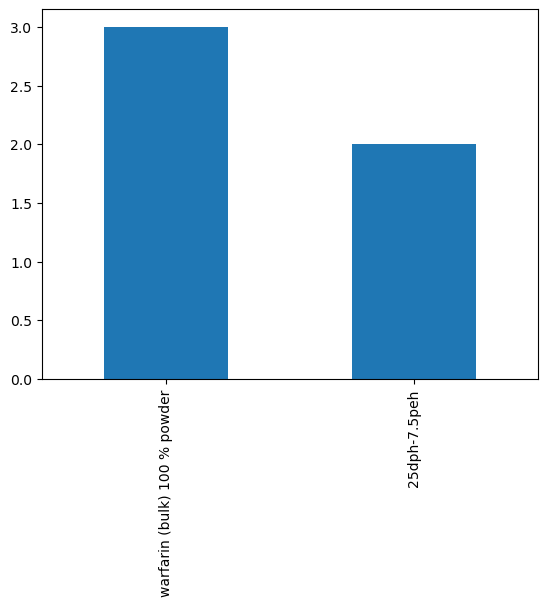

In [15]:
dataset['Drug'].value_counts().head(15).plot(kind='bar')
#plt.webmd.new['figure.figsize']=(10,7)
plt.show()

### conditions of the drugs

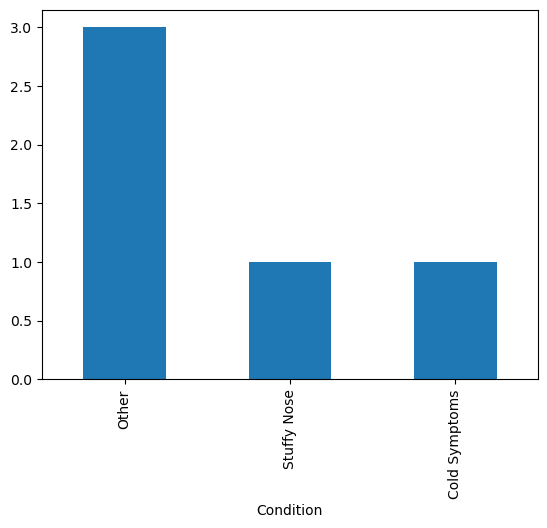

In [16]:
dataset['Condition'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Condition')
plt.show()

### side effects of the drug

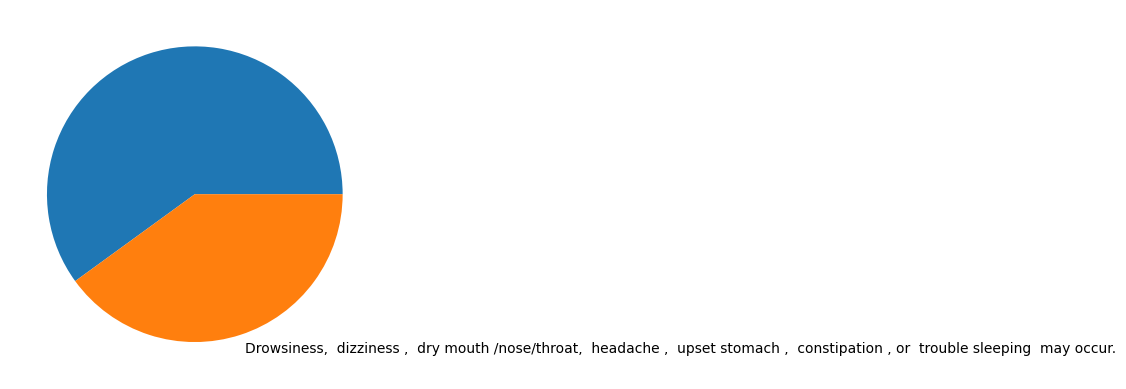

In [17]:
dataset['Sides'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [18]:
#plt.figure(figsize=(10, 6))
#sns.countplot(x='','Sides'hue=Sides,data1)

<Axes: xlabel='Age', ylabel='count'>

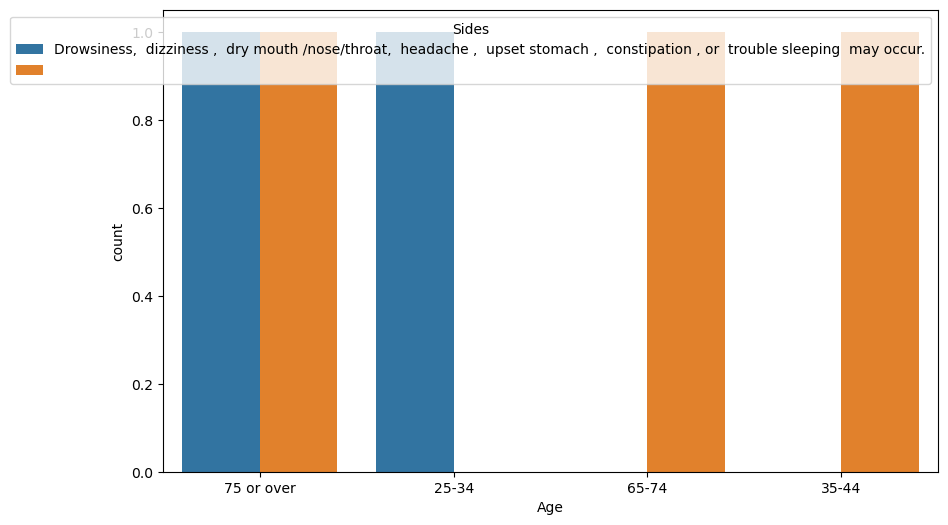

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sides',data=dataset)

In [20]:
data_encod = dataset[['Race','Age','Drug','Condition','Sex']]
dataset.columns

Index(['Race', 'Name', 'Age', 'Drug', 'Condition', 'Sex', 'Sides'], dtype='object')

In [21]:
dataset

,Race,Name,Age,Drug,Condition,Sex,Sides
0,Black,Edelmira,75 or over,25dph-7.5peh,Stuffy Nose,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,White,Ivey,25-34,25dph-7.5peh,Cold Symptoms,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,Black,Tashia,65-74,warfarin (bulk) 100 % powder,Other,Female,
3,Hispanic,Ngoc,75 or over,warfarin (bulk) 100 % powder,Other,Female,
4,Asian,Jesus,35-44,warfarin (bulk) 100 % powder,Other,Male,
...,...,...,...,...,...,...,...
362801,Hispanic,Chang,NaN,NaN,NaN,NaN,NaN
362802,White,Dannie,NaN,NaN,NaN,NaN,NaN
362803,Hispanic,Lemuel,NaN,NaN,NaN,NaN,NaN
362804,White,Curt,NaN,NaN,NaN,NaN,NaN


### Encoding : One Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
dataset_encod = pd.get_dummies(data_encod)
dataset_encod

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_25-34,Age_35-44,Age_65-74,Age_75 or over,Drug_25dph-7.5peh,Drug_warfarin (bulk) 100 % powder,Condition_Cold Symptoms,Condition_Other,Condition_Stuffy Nose,Sex_Female,Sex_Male
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
362802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
362803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
362804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Concatenate the encoded DataFrame with the remaining columns
dataset=pd.concat([dataset_encod,dataset.drop(columns=data_encod)],axis=1)
dataset

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_25-34,Age_35-44,Age_65-74,Age_75 or over,Drug_25dph-7.5peh,Drug_warfarin (bulk) 100 % powder,Condition_Cold Symptoms,Condition_Other,Condition_Stuffy Nose,Sex_Female,Sex_Male,Name,Sides
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,Edelmira,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,Ivey,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,Tashia,
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,Ngoc,
4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,Jesus,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Chang,NaN
362802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Dannie,NaN
362803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Lemuel,NaN
362804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Curt,NaN


In [25]:
dataset

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_25-34,Age_35-44,Age_65-74,Age_75 or over,Drug_25dph-7.5peh,Drug_warfarin (bulk) 100 % powder,Condition_Cold Symptoms,Condition_Other,Condition_Stuffy Nose,Sex_Female,Sex_Male,Name,Sides
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,Edelmira,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,Ivey,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,Tashia,
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,Ngoc,
4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,Jesus,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Chang,NaN
362802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Dannie,NaN
362803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Lemuel,NaN
362804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Curt,NaN


In [26]:
dataset.to_csv(r'C:\Users\HP\Desktop\internship\drug_dataset1.csv')

### replacing the empty space value in dataset with fill method 

In [27]:
test = dataset['Sides'].replace(' ', method='bfill')


In [28]:
test

0         Drowsiness,  dizziness ,  dry mouth /nose/thro...
1         Drowsiness,  dizziness ,  dry mouth /nose/thro...
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
362801                                                  NaN
362802                                                  NaN
362803                                                  NaN
362804                                                  NaN
362805                                                  NaN
Name: Sides, Length: 362806, dtype: object

### Generating Text processing Model

In [29]:
x=dataset.drop(['Sides','Name'],axis=1)
y=dataset['Sides'].replace(' ', method='ffill', inplace=True)

In [30]:
x

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_25-34,Age_35-44,Age_65-74,Age_75 or over,Drug_25dph-7.5peh,Drug_warfarin (bulk) 100 % powder,Condition_Cold Symptoms,Condition_Other,Condition_Stuffy Nose,Sex_Female,Sex_Male
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
362802,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
362803,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
362804,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
y=dataset['Sides']

In [32]:
nullsum = y.isna()

In [33]:
nullsum

0         False
1         False
2         False
3         False
4         False
          ...  
362801     True
362802     True
362803     True
362804     True
362805     True
Name: Sides, Length: 362806, dtype: bool

In [34]:
y.fillna('Drowsiness, dizziness , dry mouth /nose/thro...', inplace=True)

In [35]:
nullsum = y.isna()

In [36]:
nullsum

0         False
1         False
2         False
3         False
4         False
          ...  
362801    False
362802    False
362803    False
362804    False
362805    False
Name: Sides, Length: 362806, dtype: bool

In [37]:
#y

In [38]:
col = x.columns

In [39]:
col

Index(['Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White', 'Age_25-34',
       'Age_35-44', 'Age_65-74', 'Age_75 or over', 'Drug_25dph-7.5peh',
       'Drug_warfarin (bulk) 100 % powder', 'Condition_Cold Symptoms',
       'Condition_Other', 'Condition_Stuffy Nose', 'Sex_Female', 'Sex_Male'],
      dtype='object')

In [40]:

#row = data1[data1['Sides'] == ' ']
#print(row)

In [41]:
#y

In [42]:
row = [dataset['Sides'] == 'NaN']
print(row)

[0         False
1         False
2         False
3         False
4         False
          ...  
362801    False
362802    False
362803    False
362804    False
362805    False
Name: Sides, Length: 362806, dtype: bool]


In [43]:
row = dataset[dataset['Sides'] == 'NaN']
print(row)

Empty DataFrame
Columns: [Race_Asian, Race_Black, Race_Hispanic, Race_White, Age_25-34, Age_35-44, Age_65-74, Age_75 or over, Drug_25dph-7.5peh, Drug_warfarin (bulk) 100 % powder, Condition_Cold Symptoms, Condition_Other, Condition_Stuffy Nose, Sex_Female, Sex_Male, Name, Sides]
Index: []


In [44]:
# splitting data into train and validation

from sklearn.model_selection import train_test_split



In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model = lr.fit(x_train,y_train)


In [47]:
y_predictions = model.predict(x_test)

In [48]:
y_predictions

array(['Drowsiness, dizziness , dry mouth /nose/thro...',
       'Drowsiness, dizziness , dry mouth /nose/thro...',
       'Drowsiness, dizziness , dry mouth /nose/thro...', ...,
       'Drowsiness, dizziness , dry mouth /nose/thro...',
       'Drowsiness, dizziness , dry mouth /nose/thro...',
       'Drowsiness, dizziness , dry mouth /nose/thro...'], dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [50]:
confusion_matrix(y_test,y_predictions)

array([[    0,     1],
       [    0, 72561]], dtype=int64)

In [51]:
print('Accuracy=',accuracy_score(y_test,y_predictions))

Accuracy= 0.9999862186819547


In [52]:
# saving the model to the disk
pickle.dump(model,open('model.pkl','wb'))